In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')


In [2]:

train_info = train.info()
train_description = train.describe()
train_value_counts = {col: train[col].value_counts() for col in train.columns if train[col].dtype == 'object'}

train_info, train_description, train_value_counts.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
 dict_keys(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarke

In [3]:
pairplot_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
train_subset = train[pairplot_features].copy()

In [4]:
train_subset['Sex'] = train_subset['Sex'].map({'male': 0, 'female': 1})


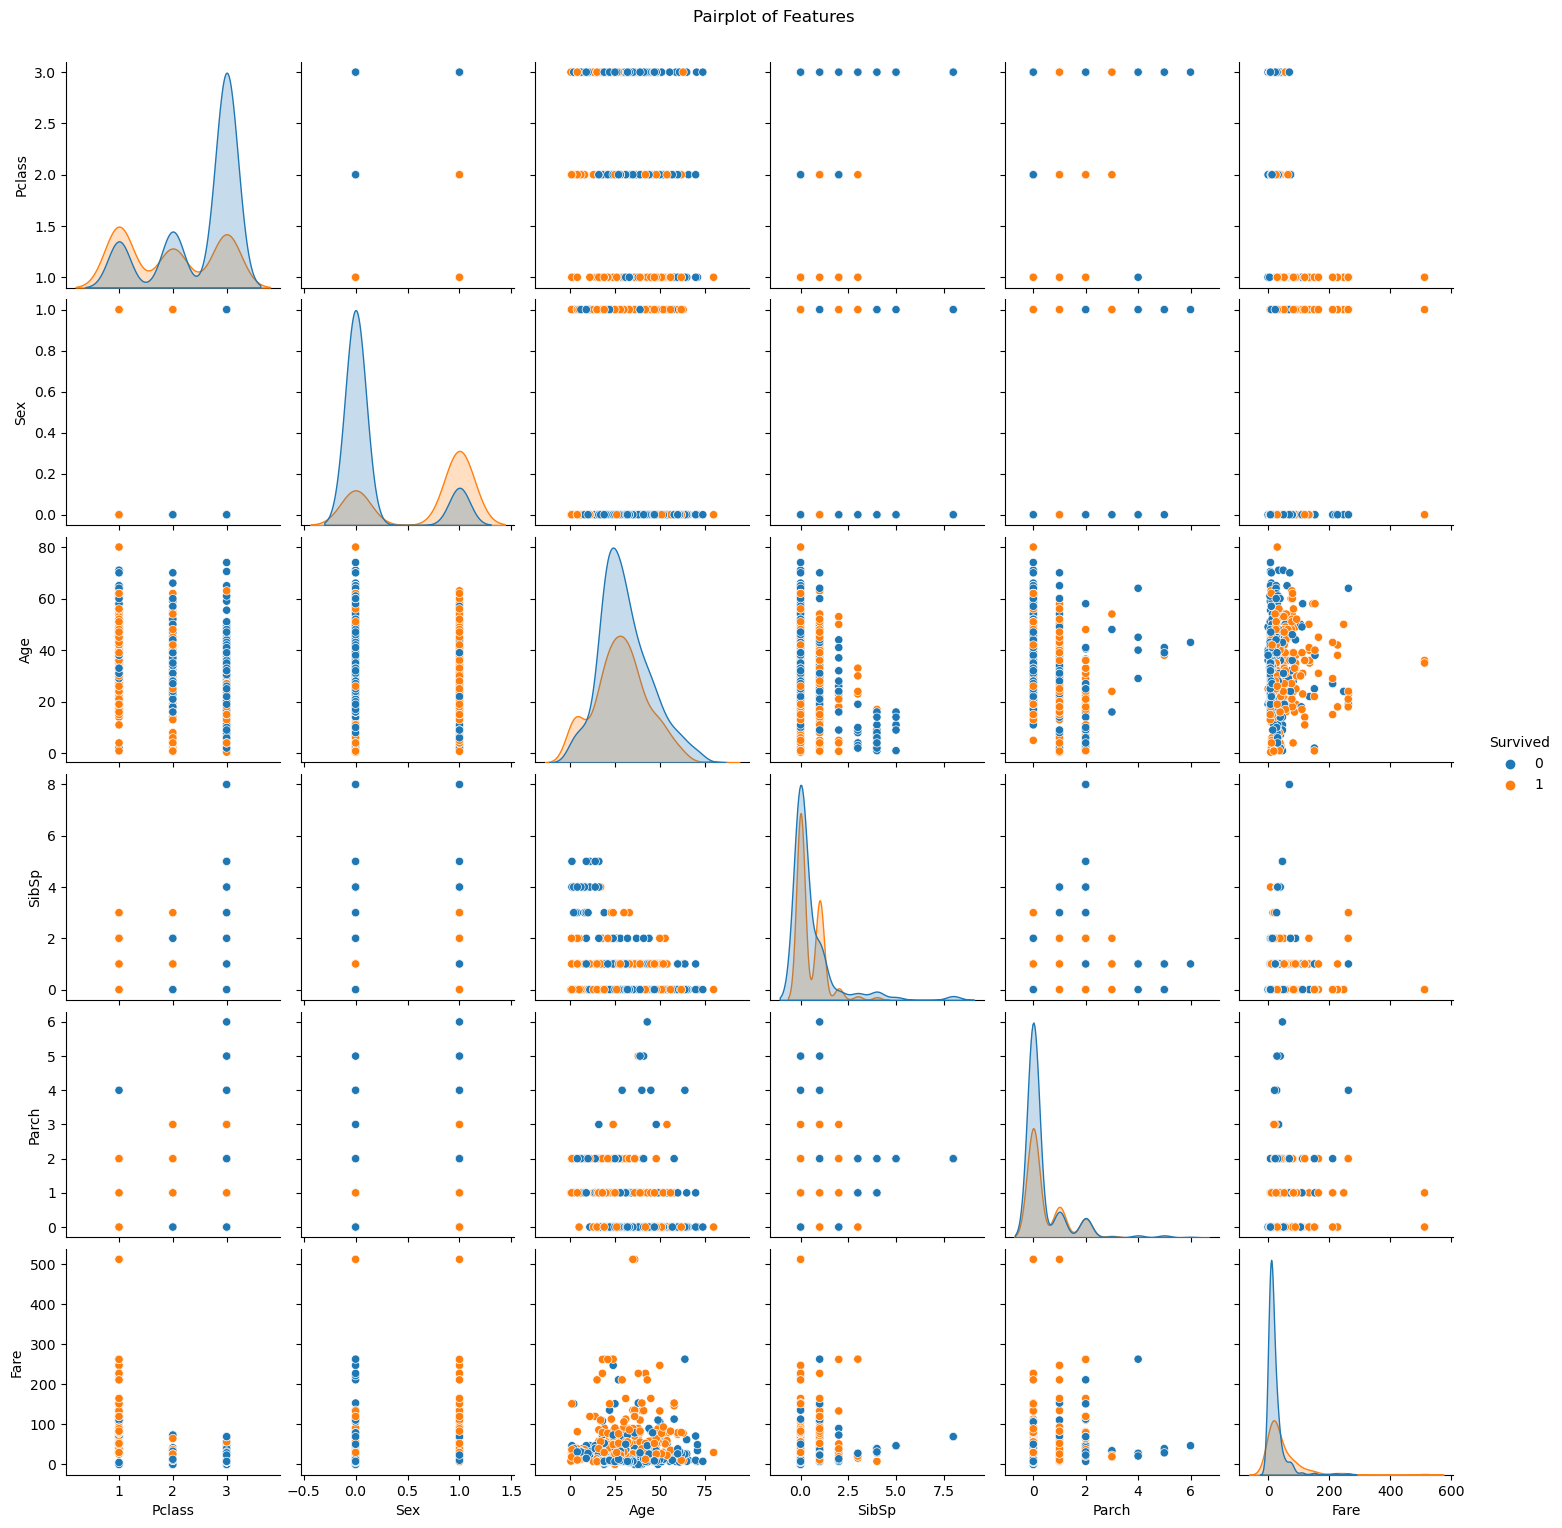

In [5]:
sns.pairplot(train_subset, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

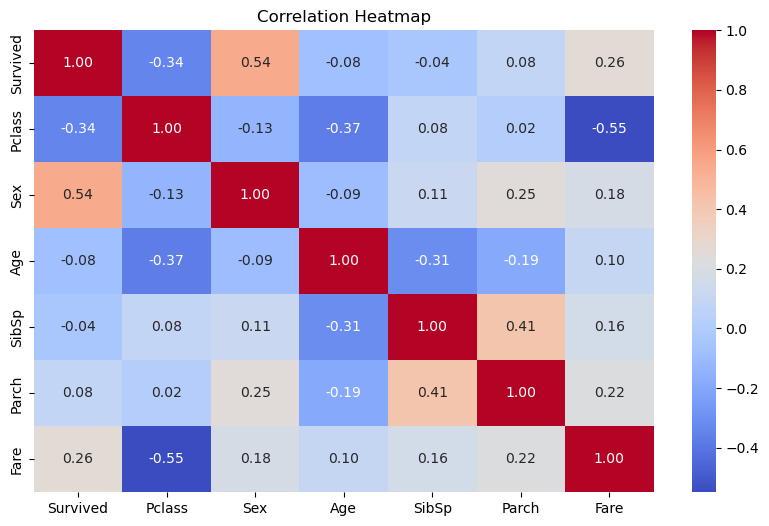

In [6]:
plt.figure(figsize=(10, 6))
corr_matrix = train_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

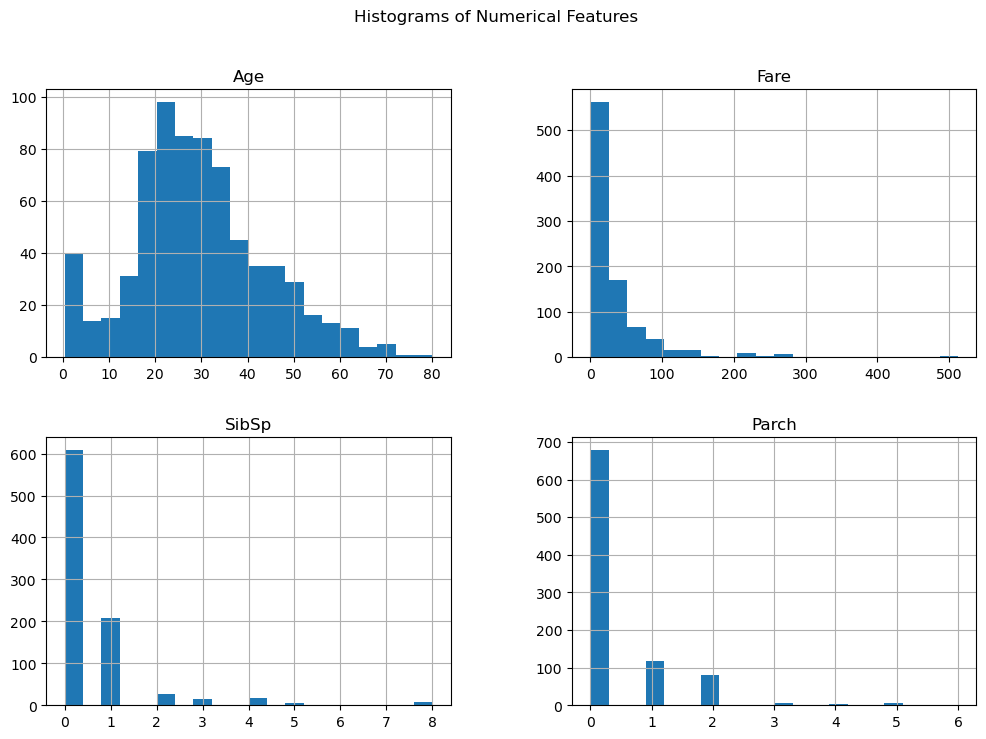

In [7]:
train_subset[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [8]:
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

Text(0.5, 1.0, 'Boxplot: Age vs Survived')

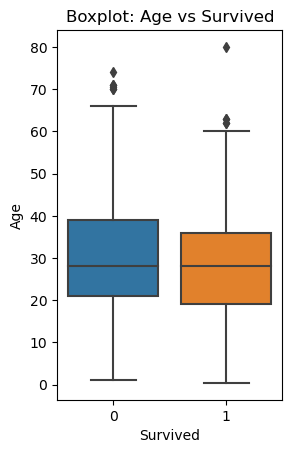

In [9]:
plt.subplot(1, 2, 1)
sns.boxplot(data=train, x='Survived', y='Age')
plt.title('Boxplot: Age vs Survived')

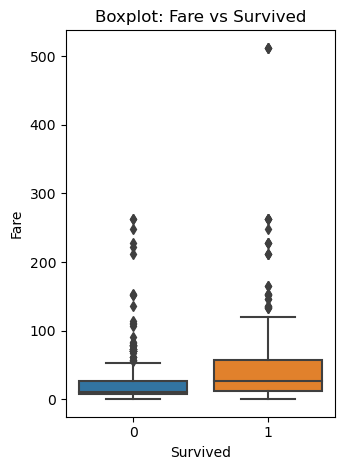

In [10]:
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x='Survived', y='Fare')
plt.title('Boxplot: Fare vs Survived')

plt.tight_layout()
plt.show()

In [11]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Scatterplot: Age vs Fare (Survival hue)')

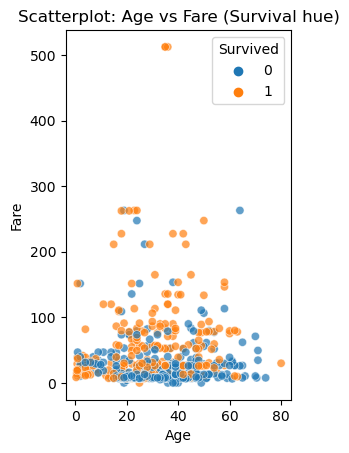

In [12]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title('Scatterplot: Age vs Fare (Survival hue)')

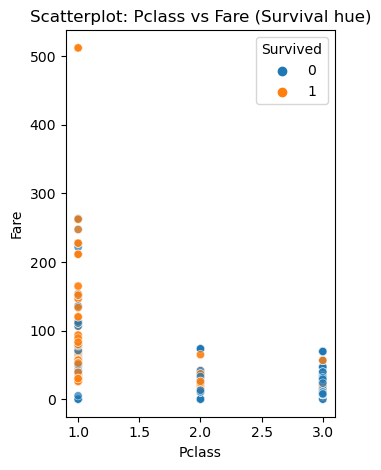

In [13]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=train, x='Pclass', y='Fare', hue='Survived', alpha=0.7)
plt.title('Scatterplot: Pclass vs Fare (Survival hue)')

plt.tight_layout()
plt.show()

### OBSERVATIONS FROM PAIRPLOT:
- Sex vs Survived:
  - More females survived than males (strong separation).
- Fare vs Survived:
  - People who paid higher fares had better survival chances.
- Pclass vs Survived:
  - 1st class passengers survived more.
- Age vs Survived:
  - No sharp trend, but younger passengers had slightly higher survival.

### OBSERVATION FROM HEATMAP
- Strong negative correlation between Sex (male=0, female=1) and Survived (~0.54).
- Fare and Survived have a positive correlation (~0.26).
- SibSp and Parch have weak correlations individually.
- Pclass and Survived have a moderate negative correlation (~-0.34).

###  Observations from Histograms:
- AGE
   - Most passengers were between 20-40 years.
   - Some children (<10 years) and elderly (>60 years) too.
- Fare:
   - Highly right-skewed — majority paid less than 50.
   
- SibSp (Siblings/Spouse) and Parch (Parents/Children):
   - Most had 0 family members onboard.

## Observations from Boxplots:
- Age vs Survived:
  - Median age of survivors slightly lower than non-survivors.
  - More young people survived.
- Fare vs Survived:
  - Survivors paid higher fares on average.
  - Big difference in upper ranges.

### Observations from Scatterplots:
- Age vs Fare (hue=Survived):
  - Young passengers paying high fares survived more.
- Pclass vs Fare (hue=Survived):
  - 1st class passengers paid high fares and had higher survival rates.

### Overall Summary of Findings

| Aspect | Observation |
| :--- | :--- |
| **Sex** | Females had higher survival rates. |
| **Pclass** | 1st class had better survival odds. |
| **Fare** | Higher fare correlated with survival. |
| **Age** | Young passengers (children and youth) slightly more likely to survive. |
| **Family (SibSp, Parch)** | Small families had a slight survival advantage. |
| **Cabin Info** | Many missing; passengers with cabin numbers likely from 1st class (better survival). |
